<a href="https://colab.research.google.com/github/vanquoc12/giuaky-20146406-vanquoc/blob/main/face4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_data.flow_from_directory('/content/drive/MyDrive/face/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 39 images belonging to 5 classes.


In [ ]:
training_set.class_indices

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(150,150,3), padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3), activation='relu', padding='same'))
model.add(LeakyReLU(alpha=0.1)) 
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,kernel_size=(3,3), activation='relu', padding='same')) 
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

#ANN
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(5,activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
train=model.fit(training_set,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
2/2 [==============================] - 6s 2s/step - loss: 4.0875 - accuracy: 0.1795
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 1.6747 - accuracy: 0.3846
Epoch 3/10
2/2 [==============================] - 4s 3s/step - loss: 1.4221 - accuracy: 0.6154
Epoch 4/10
2/2 [==============================] - 3s 680ms/step - loss: 1.2069 - accuracy: 0.7949
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 0.9107 - accuracy: 0.7949
Epoch 6/10
2/2 [==============================] - 3s 699ms/step - loss: 0.5641 - accuracy: 0.8205
Epoch 7/10
2/2 [==============================] - 4s 684ms/step - loss: 0.3327 - accuracy: 0.8205
Epoch 8/10
2/2 [==============================] - 3s 2s/step - loss: 0.1395 - accuracy: 0.9744
Epoch 9/10
2/2 [==============================] - 3s 2s/step - loss: 0.0393 - accuracy: 1.0000
Epoch 10/10
2/2 [==============================] - 4s 671ms/step - loss: 0.0279 - accuracy: 1.0000


In [ ]:
#Lưu
from keras.models import load_model
model.save("Hoa(CNN).h5")
model_1=load_model('Hoa(CNN).h5')

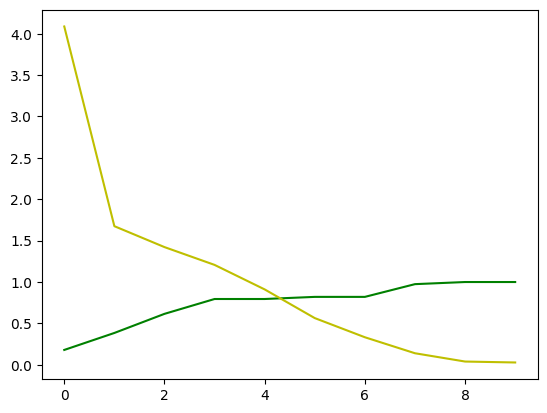

In [ ]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()

In [ ]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/face/test'


1/1 [==============================] - 1s 516ms/step
Hong


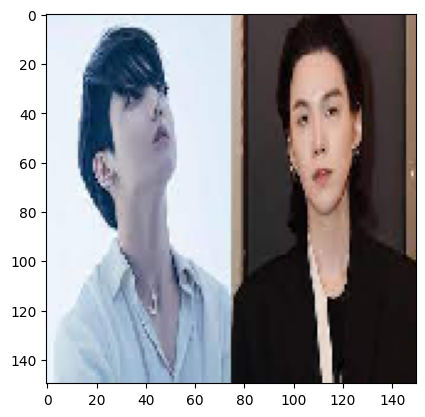

1/1 [==============================] - 0s 97ms/step
Cuc


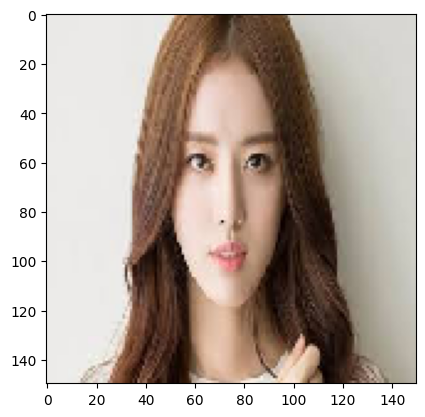

In [ ]:
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Boconganh','Cuc','Hong','huongduong','tulib']
  print(class_name[result]) 
  plt.show()
